# Animation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Table of Contents
0. [Notebook Setup](#setup)
1. [Basic Animation](#basic)
  1. [Function Animation](#function_animation)
  2. [Artist Animation](#artist_animation)
2. [Creating a Movie](#writing)
3. [3D](#3D)
4. [Multiplot](#multiplot)


<a id=setup></a>
# 1. Notebook Setup

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
from IPython.display import HTML

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=basic></a>
# 2. Basic Animation

<a id=function_animation></a>
## 2.A Function Animation
Makes an animation by repeatedly calling a function.

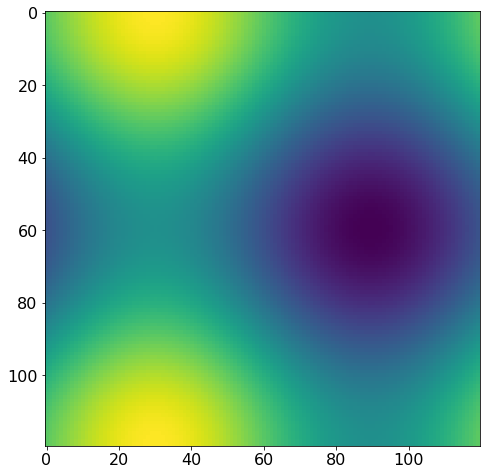

In [71]:
class FunctionAnimatedImage():
    
    def func(self):
        return np.sin(self.x) + np.cos(self.y)
    
    def __init__(self):
        self.x = np.linspace(0, 2 * np.pi, 120)
        self.y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)

        self.im = plt.imshow(self.func(), animated=True)
        
    def next_frame(self, i, *args):
        
        self.x += np.pi / 5.
        self.y += np.pi / 20.
        self.im.set_array(self.func())
        return self.im,

fig = plt.figure()
anim_img = FunctionAnimatedImage()

In [68]:
# Animate the image by recursively calling the next_frame function
ani_1 = animation.FuncAnimation(fig, anim_img.next_frame, frames=40, interval=50, blit=True)

# Embed the video in an html 5.0 video tag
HTML(ani_1.to_html5_video())

<a id=artist_animation></a>
## 2.B Artist Animation
Animation using a fixed set of Artist objects

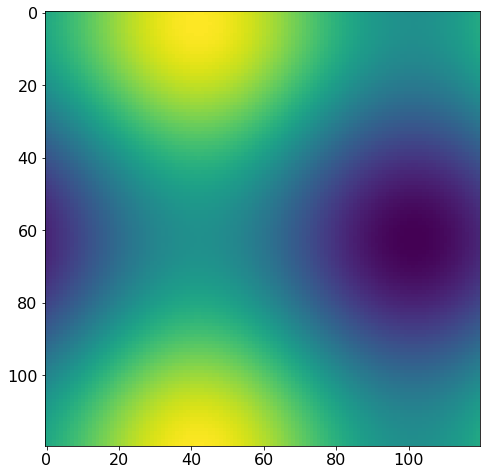

In [76]:
fig2 = plt.figure()

N_FRAMES = 40

# define the function to plot
def f(x, y):
    return np.sin(x) + np.cos(y)

# create a list of images
ims = []
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
for i in range(N_FRAMES):
    z = f(x, y)
    ims.append((plt.imshow(z),))
    x += np.pi / 5.
    y += np.pi / 20.
    

In [77]:
ani_2 = animation.ArtistAnimation(fig2, ims, interval=50, blit=True)
HTML(ani_2.to_html5_video())

<a id=writing></a>
# 3. Writing to a file

In [87]:
# list available writers
animation.writers.list()

# save ani_2 in mpeg format

# create a writer instance
WriterClass = animation.writers['ffmpeg']
writer = WriterClass(fps=1000./50.)

# save the image to a file using the writer
ani_2.save('/tmp/ani.mp4', writer=writer)


<a id=3D></a>
# 4. 3D

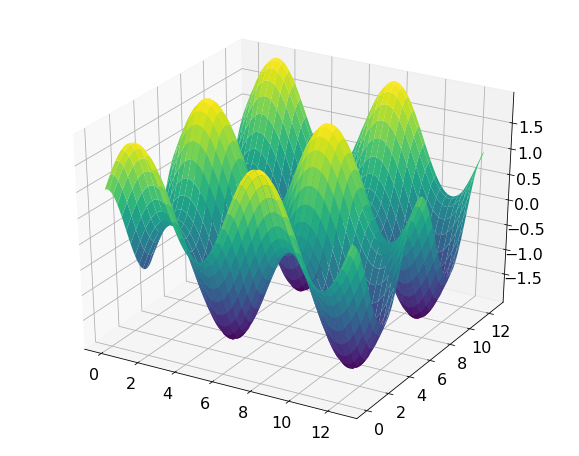

In [95]:
N_DESCEND = 50
N_CONST = 30
N_FRAMES_3D = N_DESCEND + N_CONST

class FunctionAnimated3DImage():
    
    def f(self, i):
        if i < N_DESCEND:
            return (np.sin(self.x + i*np.pi/5.) + np.cos(self.y + i*np.pi/20.))*(1 - i/N_DESCEND)
        else:
            return (np.sin(self.x + i*np.pi/5.) + np.cos(self.y + i*np.pi/20.))*0.01
    
    def __init__(self, ax3D):
        
        self.ax3D = ax3D
        
        x = np.linspace(0, 4 * np.pi, 120)
        y = np.linspace(0, 4 * np.pi, 120).reshape(-1, 1)
        self.x, self.y = np.meshgrid(x, y)
        self.z = self.f(0)

        self.surf = self.ax3D.plot_surface(self.x, self.y, self.z, cmap='viridis')
        
    def update_surf(self, i, *args):
        self.z = self.f(i)
        self.ax3D.clear()
        self.surf = self.ax3D.plot_surface(self.x, self.y, self.z, cmap='viridis')
        self.ax3D.set_zlim(-2, 2)
        return self.surf,

fig3 = plt.figure()
ax3D = fig3.add_subplot(111, projection='3d')
animator_3D = FunctionAnimated3DImage(ax3D)


In [96]:
ani_3D = animation.FuncAnimation(fig3, animator_3D.update_surf, interval=50, blit=True, frames=N_FRAMES_3D)
HTML(ani_3D.to_html5_video())

<a id=multiplot></a>
# 5. Multiplot

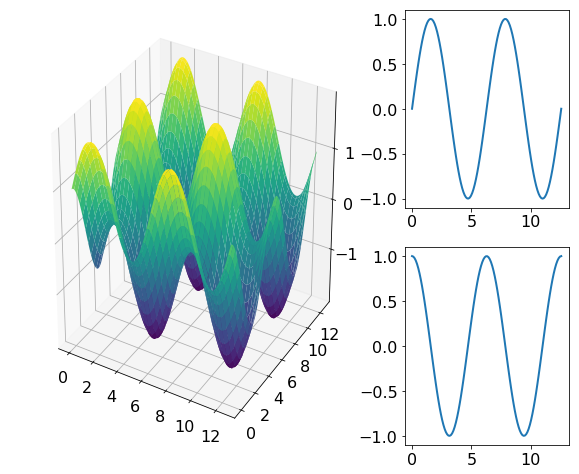

In [124]:
class FunctionAnimated3DMultiplot():
    
    def f(self, i):
        return self.fx(i) + self.fy(i)
    
    def fx(self, i):
        if i < N_DESCEND:
            return np.sin(self.x + i*np.pi/5.)*(1 - i/N_DESCEND)
        else:
            return np.sin(self.x + i*np.pi/5.)*0.01
    
    def fy(self, i):
        if i < N_DESCEND:
            return np.cos(self.y + i*np.pi/20.)*(1 - i/N_DESCEND)
        else:
            return np.cos(self.y + i*np.pi/20.)*0.01
    
    def __init__(self):
        
        self.ax3D = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d')
        self.ax2D_1 = plt.subplot2grid((2, 3), (0, 2))
        self.ax2D_2 = plt.subplot2grid((2, 3), (1, 2))  
        
        self.x = np.linspace(0, 4 * np.pi, 120)
        self.y = np.linspace(0, 4 * np.pi, 120).reshape(-1, 1)
        self.z = self.f(0)

        self.surf = self.ax3D.plot_surface(self.x, self.y, self.z, cmap='viridis')
        self.line_1 = self.ax2D_1.plot(self.x, self.fx(0))
        self.line_2 = self.ax2D_2.plot(self.y, self.fy(0))
        
    def update_plots(self, i, *args):
        self.z = self.f(i)
        self.ax3D.clear()
        self.ax2D_1.clear()
        self.ax2D_2.clear()
        
        self.surf = self.ax3D.plot_surface(self.x, self.y, self.z, cmap='viridis')
        self.ax3D.set_zlim(-2, 2)
        
        self.line_1 = self.ax2D_1.plot(self.x, self.fx(i))
        self.ax2D_1.set_ylim(-1, 1)
        
        self.line_2 = self.ax2D_2.plot(self.y, self.fy(i))
        self.ax2D_2.set_ylim(-1, 1)
        return self.line_1

fig_3D_mp = plt.figure()
animator_3D_mp = FunctionAnimated3DMultiplot()

In [125]:
ani_3D_mp = animation.FuncAnimation(fig_3D_mp, animator_3D_mp.update_plots, interval=50, blit=True, frames=N_FRAMES_3D)
HTML(ani_3D_mp.to_html5_video())